In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [27]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are tons of missing value, we need to explore the data more 

In [28]:
#Here we can make a helper function to distinguish different types of columns, and return lists that contain names.
def get_all_cols(df, target_col, exclude=None):
        
    if exclude is None:
        exclude = []
        
    # Select categorical columns
    object_cols = [cname for cname in df.columns 
                   if df[cname].dtype == "object"]

    # Select numerical columns
    num_cols = [cname for cname in df.columns 
                if df[cname].dtype in ['int64', 'float64', 'uint8']]
    
    all_cols = object_cols + num_cols
    exclude_cols = exclude + [target_col]
    feature_cols = [col for col in all_cols if col not in exclude_cols]
    
    return object_cols, num_cols, feature_cols

In [29]:
TARGET = "Transported"#the target of this dataset
object_cols, num_cols, feature_cols = get_all_cols(train_df, TARGET)

In [30]:
object_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

Then we can explore the unique values and there amounts

In [31]:
for object_col in object_cols:
    obj_val_counts = train_df[object_col].value_counts()
    print(f'LENGTH: {len(obj_val_counts)}\n',f'{obj_val_counts}\n')

LENGTH: 8693
 3417_01    1
1833_01    1
3868_01    1
1892_02    1
7748_01    1
          ..
3729_01    1
8637_02    1
4382_01    1
5514_01    1
1100_03    1
Name: PassengerId, Length: 8693, dtype: int64

LENGTH: 3
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

LENGTH: 2
 False    5439
True     3037
Name: CryoSleep, dtype: int64

LENGTH: 6560
 G/734/S     8
E/13/S      7
G/1476/S    7
F/1411/P    7
G/109/P     7
           ..
F/1532/S    1
E/166/P     1
A/56/P      1
G/161/P     1
E/296/S     1
Name: Cabin, Length: 6560, dtype: int64

LENGTH: 3
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

LENGTH: 2
 False    8291
True      199
Name: VIP, dtype: int64

LENGTH: 8473
 Glena Hahnstonsen     2
Elaney Webstephrey    2
Sharie Gallenry       2
Apix Wala             2
Cuses Pread           2
                     ..
Bath Dinsprody        1
Mans Kill             1
Karia Davens          1
Rancy Vincenton       1
H

Good, now we can start feature engineering. First we can fill nan value.

In [32]:
#fill the col with it's most frequent value
train_df.fillna(train_df[['HomePlanet','Destination','CryoSleep','VIP']].mode().iloc[0], inplace=True)
test_df.fillna(test_df[['HomePlanet','Destination','CryoSleep','VIP']].mode().iloc[0], inplace=True)

In [33]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [34]:
train_df[['CryoSleep','VIP']] = train_df[['CryoSleep','VIP']].astype(int)
test_df[['CryoSleep','VIP']] = test_df[['CryoSleep','VIP']].astype(int)
train_df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [35]:
#let us handle the missing numerical value
print(num_cols)
train_df.fillna(train_df[num_cols].mean(), inplace=True)
test_df.fillna(test_df[num_cols].mean(), inplace=True)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [36]:
train_df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.000000,0.0,0.000000,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.000000,549.0,44.000000,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.000000,6715.0,49.000000,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.000000,3329.0,193.000000,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.000000,565.0,2.000000,Willy Santantines,True
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.000000,291.0,0.000000,Sandie Hinetthews,True
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.000000,0.0,0.000000,Billex Jacostaffey,True
7,0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.000000,0.0,304.854791,Candra Jacostaffey,True
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.000000,216.0,0.000000,Andona Beston,True
9,0008_01,Europa,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.000000,0.0,0.000000,Erraiam Flatic,True


In [37]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Good, the missing value and nan are fixed. But the raw data for cabin makes no sense, we need to split it.

In [38]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)   
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
train_df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
5539,5905_01,Earth,0,G/959/S,TRAPPIST-1e,23.0,0,16.0,687.000000,1.0,1.0,0.0,Elindy Byerry,True,G,959,S
1280,1355_01,Earth,1,G/203/P,PSO J318.5-22,22.0,0,0.0,0.000000,0.0,0.0,0.0,Timmie Paynard,True,G,203,P
6238,6599_01,Europa,1,C/245/S,TRAPPIST-1e,49.0,0,0.0,458.077203,0.0,0.0,0.0,Kitak Esseal,True,C,245,S
1037,1102_01,Mars,0,F/227/P,PSO J318.5-22,39.0,0,173.0,0.000000,660.0,1.0,781.0,Boats Dan,False,F,227,P
6281,6650_01,Earth,0,G/1077/P,TRAPPIST-1e,48.0,0,12.0,0.000000,0.0,0.0,796.0,Joelan Beasleyes,False,G,1077,P
7959,8503_03,Europa,1,B/279/P,55 Cancri e,18.0,0,0.0,0.000000,0.0,0.0,0.0,Tabdhib Coweboded,True,B,279,P
5137,5488_02,Europa,0,B/186/P,TRAPPIST-1e,15.0,0,0.0,22.000000,6805.0,0.0,531.0,Acrabik Hoorherve,True,B,186,P
5863,6207_03,Mars,0,E/397/P,TRAPPIST-1e,19.0,0,0.0,0.000000,0.0,0.0,0.0,Caper Brity,False,E,397,P
3283,3527_01,Mars,0,F/729/P,TRAPPIST-1e,18.0,1,733.0,0.000000,688.0,1.0,0.0,Cindee Terte,False,F,729,P
1209,1288_01,Earth,0,G/192/P,TRAPPIST-1e,24.0,0,621.0,0.000000,0.0,0.0,0.0,Nance Flemaney,False,G,192,P


In [39]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

In [40]:
train_df['Num'] = train_df['Num'].astype(float)
train_df['Num'].fillna(train_df['Num'].mean(), inplace=True)
train_df.fillna(train_df[['Deck', 'Side']].mode().iloc[0], inplace=True)


test_df['Num'] = test_df['Num'].astype(float)
test_df['Num'].fillna(train_df['Num'].mean(), inplace=True)
test_df.fillna(test_df[['Deck', 'Side']].mode().iloc[0], inplace=True)

In [41]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [42]:
#The group id in the passenger id could be useful as this decide the room and position they are together.
def create_group_id(passenger_id):
    splitted_id = passenger_id.split("_")
    group_id = splitted_id[1]
    return group_id

In [43]:
train_df["group_id"] = train_df["PassengerId"].apply(create_group_id)
train_df["group_id"] = train_df["group_id"].astype(int)

test_df["group_id"] = test_df["PassengerId"].apply(create_group_id)
test_df["group_id"] = test_df["group_id"].astype(int)

In [44]:
DROP_COLS = ['PassengerId', 'Name', 'Cabin']
train_df.drop(DROP_COLS,axis=1, inplace=True)
test_df.drop(DROP_COLS,axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   float64
 13  Side          8693 non-null   object 
 14  group_id      8693 non-null   int32  
dtypes: bool(1), float64(7), int32(3), object(4)
memory usage: 857.5+ KB


All good, then we need to do the encoding, for feature have less clasees, we can use one-hot encoding, but for those with multiclasees, we need to apply label encoding.

In [45]:
# let us figure out the object features
object_cols, num_cols, feature_cols = get_all_cols(train_df, TARGET)

for object_col in object_cols:
    obj_val_counts = train_df[object_col].value_counts()
    print(f'LENGTH: {len(obj_val_counts)}\n',f'{obj_val_counts}\n')

LENGTH: 3
 Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

LENGTH: 3
 TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

LENGTH: 8
 F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

LENGTH: 2
 S    4487
P    4206
Name: Side, dtype: int64



In [46]:
from sklearn.preprocessing import LabelEncoder
ONE_HOT_CATEGORICAL = ['HomePlanet', 'Destination', 'Side']
def create_one_hot(df, categ_colums = ONE_HOT_CATEGORICAL):
    """
    Creates one_hot encoded fields for the specified categorical columns...
    Args
        df
        categ_colums
    Returns
        df
    """
    df = pd.get_dummies(df, columns=categ_colums)
    return df

LABEL_CATEGORICAL = ['Deck']
def encode_categ_features(df, categ_colums = LABEL_CATEGORICAL):
    """
    Use the label encoder to encode categorical features...
    Args
        df
        categ_colums
    Returns
        df
    """
    le = LabelEncoder()
    for col in categ_colums:
        df['enc_'+col] = le.fit_transform(df[col])
    df.drop(categ_colums, axis=1, inplace=True)
    return df

train_df = encode_categ_features(train_df)
test_df = encode_categ_features(test_df)

train_df = create_one_hot(train_df)
test_df = create_one_hot(test_df)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int32  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   Num                        8693 non-null   float64
 10  group_id                   8693 non-null   int32  
 11  enc_Deck                   8693 non-null   int32  
 12  HomePlanet_Earth           8693 non-null   uint8  
 13  HomePlanet_Europa          8693 non-null   uint8

Finally, we are going to figure out the correlation between features using heatmap and do the feature selection.

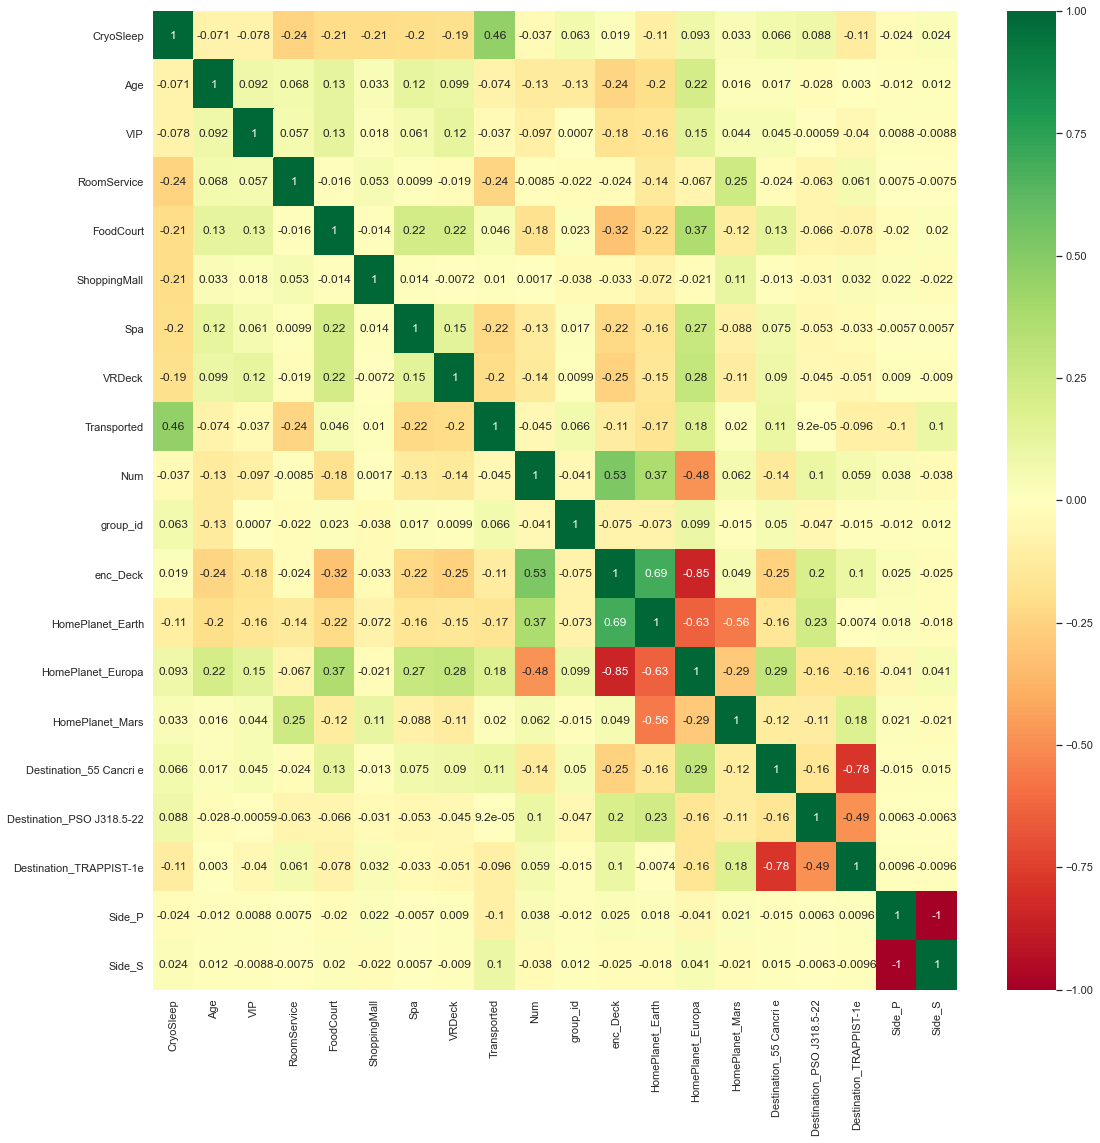

In [48]:
plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [49]:
#there is an -0.85, so we are going to drop the enc_Deck
train_df.drop("enc_Deck", axis=1, inplace=True)
test_df.drop("enc_Deck", axis=1, inplace=True)

In [51]:
TARGET

'Transported'

In [52]:
train_df.head(20)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,group_id,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.000000,0.0,0.000000,False,0.000000,1,0,1,0,0,0,1,1,0
1,0,24.0,0,109.0,9.0,25.000000,549.0,44.000000,True,0.000000,1,1,0,0,0,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.000000,6715.0,49.000000,False,0.000000,1,0,1,0,0,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.000000,3329.0,193.000000,False,0.000000,2,0,1,0,0,0,1,0,1
4,0,16.0,0,303.0,70.0,151.000000,565.0,2.000000,True,1.000000,1,1,0,0,0,0,1,0,1
5,0,44.0,0,0.0,483.0,0.000000,291.0,0.000000,True,0.000000,1,1,0,0,0,1,0,1,0
6,0,26.0,0,42.0,1539.0,3.000000,0.0,0.000000,True,2.000000,1,1,0,0,0,0,1,0,1
7,1,28.0,0,0.0,0.0,0.000000,0.0,304.854791,True,0.000000,2,1,0,0,0,0,1,0,1
8,0,35.0,0,0.0,785.0,17.000000,216.0,0.000000,True,3.000000,1,1,0,0,0,0,1,0,1
9,1,14.0,0,0.0,0.0,0.000000,0.0,0.000000,True,1.000000,1,0,1,0,1,0,0,1,0


In [ ]:
train_df.to_csv('processed data/processed_train.csv', index=False)
test_df.to_csv('processed data/processed_test.csv', index=False)